# Business Analytics
# Mohammed Sarshaar

## **Question 1.**

A company wants to test whether the average time taken to assemble a product has significantly decreased after implementing a new training program. Prior to the training, the average assembly time was 35 minutes with a known population standard deviation of 5 minutes. After the training, a random sample of 40 employees showed a mean assembly time of 33 minutes. Can you help the company to decide whether the new training program is necessary?

**1.Initial Assumption of Population Distribution**

We assume that the population distribution of assembly times follows a normal distribution.

**2.Null and Alternative Hypotheses**

Let μ be the population mean assembly time.


*   Null Hypothesis (H₀): The new training program has no effect on the average assembly time.
*   Alternative Hypothesis (H₁): The new training program has significantly decreased the average assembly time.

**3.Test Statistic**



In [1]:
from scipy import stats

# Given values
sample_mean = 33
population_mean = 35
population_std = 5
sample_size = 40

# Calculating z-score
z = (sample_mean - population_mean) / (population_std / (sample_size ** 0.5))
z

-2.5298221281347035

**4.Critical value and decision rule**


In [2]:
from scipy.stats import norm

alpha = 0.05
z_critical = norm.ppf(alpha)
z_critical

np.float64(-1.6448536269514729)

Decision Rule:



*   If z< -1.644, Reject Null hypothesis
*   If z>= -1.644, Accept Null hypothesis

**5.p-value**



In [3]:
from scipy.stats import norm

p_value = norm.cdf(z)
p_value

np.float64(0.005706018193000826)

**6.Conclusion:** From test of significance, we find



*   p-value (0.0057) is less than alpha (0.05)
*   z stat (-2.52) is less than z critical (-1.64)

Therefore, we reject Null hypothesis and can conclude that the new training program has significantly decreased the average assembly time. The company should continue to use the new training program.



## **Question 2.**

A university administrator wants to test whether graduate students at the institution study, on average, more than 25 hours per week. To explore this, a random sample of 15 graduate students was surveyed, and the sample mean study time was found to be 27 hours per week, with a sample standard deviation of 4.5 hours.

**1.Initial Assumption of Population Distribution**

We assume that the population distribution of study times follows a normal distribution.

**2.Null and Alternative Hypotheses**

Let μ be the population mean study time.


*   Null Hypothesis (H₀): The average study time of graduate students is 25 hours per week.
*   Alternative Hypothesis (H₁): The average study time of graduate students is more than 25 hours per week.

This is a right-tailed test since we are testing if the study time is greater than 25 hours.

**3.Test Statistic**

In [13]:
# Given values
sample_mean = 27
population_mean = 25
sample_std = 4.5
sample_size = 15

# Calculate t-score
t_stat = (sample_mean - population_mean) / (sample_std / (sample_size ** 0.5))
t_stat

1.7213259316477407

**4.Critical value and decision rule**



*   Significance level (𝛼) = 0.05
*   Degrees of freedom = n−1=14


In [6]:
from scipy.stats import t

alpha = 0.05
df = 14
t_critical = t.ppf(1 - alpha, df)
t_critical

np.float64(1.7613101357748562)

Decision Rule:


*   If t> 1.76 , Reject Null hypothesis
*   If t<=1.76 , Accept Null hypothesis

**5.p-value**

In [14]:
from scipy.stats import t

p_value = t.sf(t_stat, df)
p_value


np.float64(0.05360191367469441)

**6.Conclusion:** From test of significance, we find



*   p-value (0.053) is greater than alpha (0.05)
*   t stat (1.721) is less than t critical (1.76)

Therefore, we accept alternate hypothesis and can conclude that graduate students study more than 25 hours per week.

##Question 3

A researcher is studying the relationship between hours of study and exam scores for graduate students. The above data was collected from a sample of 30 students.

a.	Fit a simple linear regression model to the data, where the dependent variable (Y) is the exam score, and the independent variable (X) is the hours of study.

b.	What are the assumptions of simple linear regression, and do you think they hold for this dataset?

c.	How would outliers in the data affect the regression model?

d.	If you need to verify the model what will you need and what will you do?

e.	Can you verify your regression model?


**a. Fit a simple linear regression model**

To fit a simple linear regression model, we need to form the equation:

Y = b₀ + b₁X

where


*   Y = Exam Score
*   X = Hours of Study


*   b₀ = Y-intercept
*   b₁ = Slope






In [23]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Inserting given values into dataframe
data = {
    'Hours_of_Study': [5, 5, 7, 3, 0, 5, 2, 7, 4, 2, 1, 6, 8, 5, 7, 8, 7, 8, 8, 8, 0, 8, 7, 4, 6, 7, 2, 0, 8, 4],
    'Score': [52.1221, 52.1221, 72.1221, 32.1221, 2.122104, 52.1221, 22.1221, 72.1221, 42.1221, 22.1221, 12.1221, 62.1221, 82.1221, 52.1221, 72.1221, 82.1221, 72.1221, 82.1221, 82.1221, 82.1221, 2.122104, 82.1221, 72.1221, 42.1221, 62.1221, 72.1221, 22.1221, 2.122104, 82.1221, 42.1221]
}

df = pd.DataFrame(data)
df

,Hours_of_Study,Score
0,5,52.122100
1,5,52.122100
2,7,72.122100
3,3,32.122100
4,0,2.122104
5,5,52.122100
6,2,22.122100
7,7,72.122100
8,4,42.122100
9,2,22.122100


In [18]:
# Define the dependent and independent variables
X = df['Hours_of_Study']
y = df['Score']

# Adding constant term
X = sm.add_constant(X)

# Fitting the model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.311e+16
Date:                Wed, 19 Mar 2025   Prob (F-statistic):          2.20e-210
Time:                        18:26:32   Log-Likelihood:                 374.09
No. Observations:                  30   AIC:                            -744.2
Df Residuals:                      28   BIC:                            -741.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.1221   3.77e-07   5.63e

In [15]:
# Extract coefficients
b0 = model.params[0]
b1 = model.params[1]

print(f"The regression equation is: Score = {b0:.4f} + {b1:.2f} * Hours_of_Study")

The regression equation is: Score = 2.1221 + 10.00 * Hours_of_Study


<ipython-input-15-54e1115e27a6>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b0 = model.params[0]
<ipython-input-15-54e1115e27a6>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b1 = model.params[1]


This means that for every additional hour of study, the expected exam score increases by approximately 10 points.

**b.	Assumptions of simple linear regression**

*   Linearity - The relationship between the independent and dependent variable should be linear.
*   Independence - The residuals (errors) should be independent.

*   Homoscedasticity - The variance of the residuals should be constant across all levels of the independent variable.
*   Normality - The residuals should be normally distributed





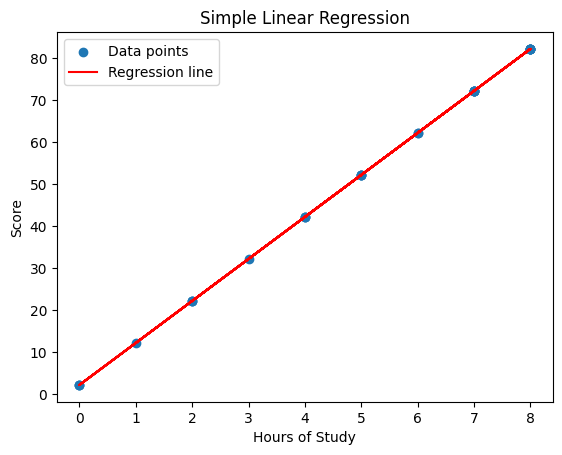

In [24]:
# Checking for linearity by plotting scatterplot
plt.scatter(df['Hours_of_Study'], df['Score'], label='Data points')
plt.plot(df['Hours_of_Study'], model.predict(X), color='red', label='Regression line')
plt.xlabel('Hours of Study')
plt.ylabel('Score')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

The scatter plot proves linearity of dataset.

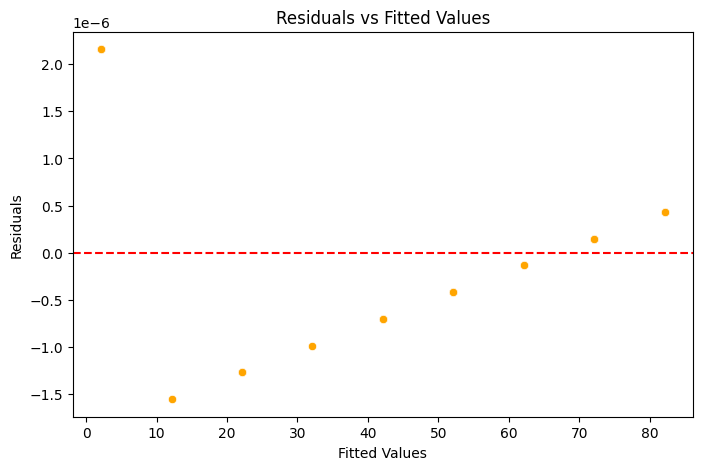

In [25]:
# Checking for Homoscedasticity by plotting a scatter plot of residuals vs. fitted values
# Predict values
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, color='orange', edgecolor='w')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

The residual plot shows that residuals are close to zero and evenly spread, proving homoscedasticity.

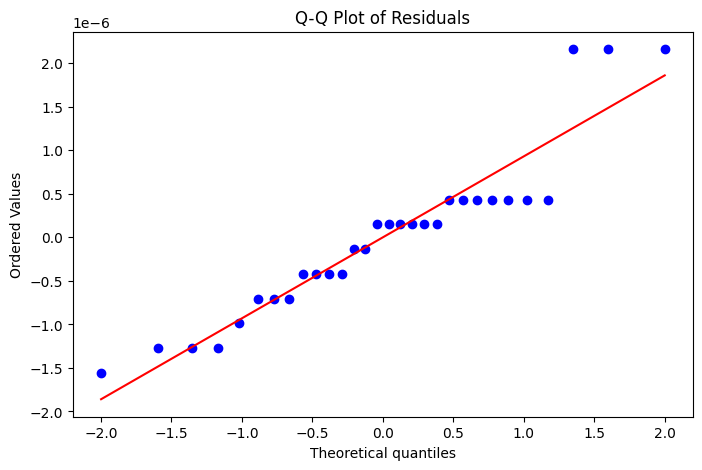

In [22]:
# Checking for Normality by plotting Q-Q plot of residuals
# Q-Q plot
plt.figure(figsize=(8, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

The residuals are normally distributed

**c.	How outliers affect the regression model**

Outliers can skew the slope and intercept.

*   Outliers can skew the slope and intercept.
*   They can increase the variance of residuals, reducing the model's predictive accuracy.

*   Outliers may also cause the model to violate the assumption of normality and homoscedasticity.






**d. How to verify the Model**



*   R square value: From the regression result, we got R square =1, so it means good fit.
*   t - test: We can perform t - test for significance of slope

*   Residual Analysis: From above scatter plot and Q-Q plot we can verify the model is good fit.






**e. Model Verification**


 From the Regression results, we got R square =1, that means the model explains nearly 100% of the variance in exam scores, indicating an excellent fit.




##Question 4

A manufacturing company produces three products: Product A, Product B, and Product C. Each product requires different amounts of two types of machines, Machine X and Machine Y. Machine X is available for 100 hours per week, and Machine Y is available for 85 hours per week. The company wants to maximize its total production output.

a.	Please formulate this problem as a linear programming problem in standard form. Please clearly define your variable before you write the math formulation.

b.	Solve the problem in Excel or Python.

c.	Is the problem bounded by machine X or Y? If you have a budget to upgrade the machine, will you upgrade machine X or Y? Please explain your answer by exploring the math model.


**a. Formulate the Linear Programming Problem**

Let x be the number of units of Product A to produce.

Let y be the number of units of Product B to produce.

Let z be the number of units of Product C to produce.

Our objective is to maximize the production output.

Objective function: Z = x + y + z

So, we can formulate the following linear equations:


*   Machine X: 2x + y + 3z <= 100
*   Machine Y: 4x + 3y + 2z <= 85

where x >= 0, y >= 0 and  z >= 0




**b. Solving the Problem in Python**

We use the scipy.optimize.linprog function to solve this problem.

In [28]:
from scipy.optimize import linprog

# Coefficients of the objective function
obj = [-1, -1, -1]

# From the linear equations, we take coeffients of left hand side as A and coefficients of right hand side as B

A = [[2, 1, 3],  # Machine X constraint
     [4, 3, 2]]  # Machine Y constraint


b = [100, 85]

# Bounds for the variables
x_bounds = (0, None)
y_bounds = (0, None)
z_bounds = (0, None)

# Solving the linear programming problem using linprog
result = linprog(obj, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds, z_bounds], method='highs')

# Extract and print the results
print("Product A (x):", round(result.x[0], 2))
print("Product B (y):", round(result.x[1], 2))
print("Product C (z):", round(result.x[2], 2))
print("Maximum total production:", round(-result.fun, 2))  # Negate the minimized value to get the maximum

Optimal solution:
Product A (x): 0.0
Product B (y): 7.86
Product C (z): 30.71
Maximum total production: 38.57


**c. Bounded by machine X or Y**

We can examine the binding constraints at the optimal solution to identify the machine that is the bottleneck.

Let's substitute the optimal values of x, y, and z into the constraints:



*   Machine X: 2(0) + 7.86 + 3(30.71) = 99.99 <=100
*   Machine Y: 4(0) + 3(7.86) + 2(30.71)= 85.00 <= 85

Both constraints are binding, meaning both Machine X and Machine Y are limiting the production.

**Upgrade Decision:** Since both machines are bottlenecks, upgrading either one would increase production. However, to determine which one to upgrade first, we need to consider the shadow prices or dual values

In [30]:
print("Shadow prices (dual values):", result.ineqlin.marginals)

Shadow prices (dual values): [-0.14285714 -0.28571429]


The Shodow price of Machine Y is higher. This means that for every additional hour of availability added to Machine Y, the total production output will increase by approximately 0.28571429 units.

Because Machine Y has the higher shadow price, it is the most efficient machine to upgrade.

**References**: I used Chatgpt and Gemini to assist me in python coding